# OR-tools example

This notebook demonstrates how to use `OptiWindNet` to design collector system cable layouts using the **MILPRouter with OR-Tools Solver**.

## Load data

import required modules

In [1]:
from optiwindnet.api import WindFarmNetwork, EWRouter, MILPRouter

In [2]:
# Display figures as SVG in Jupyter notebooks
%config InlineBackend.figure_formats = ['svg']

create an instance of `wfn` using `.from_pbf()`


In [3]:
wfn = WindFarmNetwork.from_pbf(filepath='data/DTU_letters.osm.pbf', cables=7)

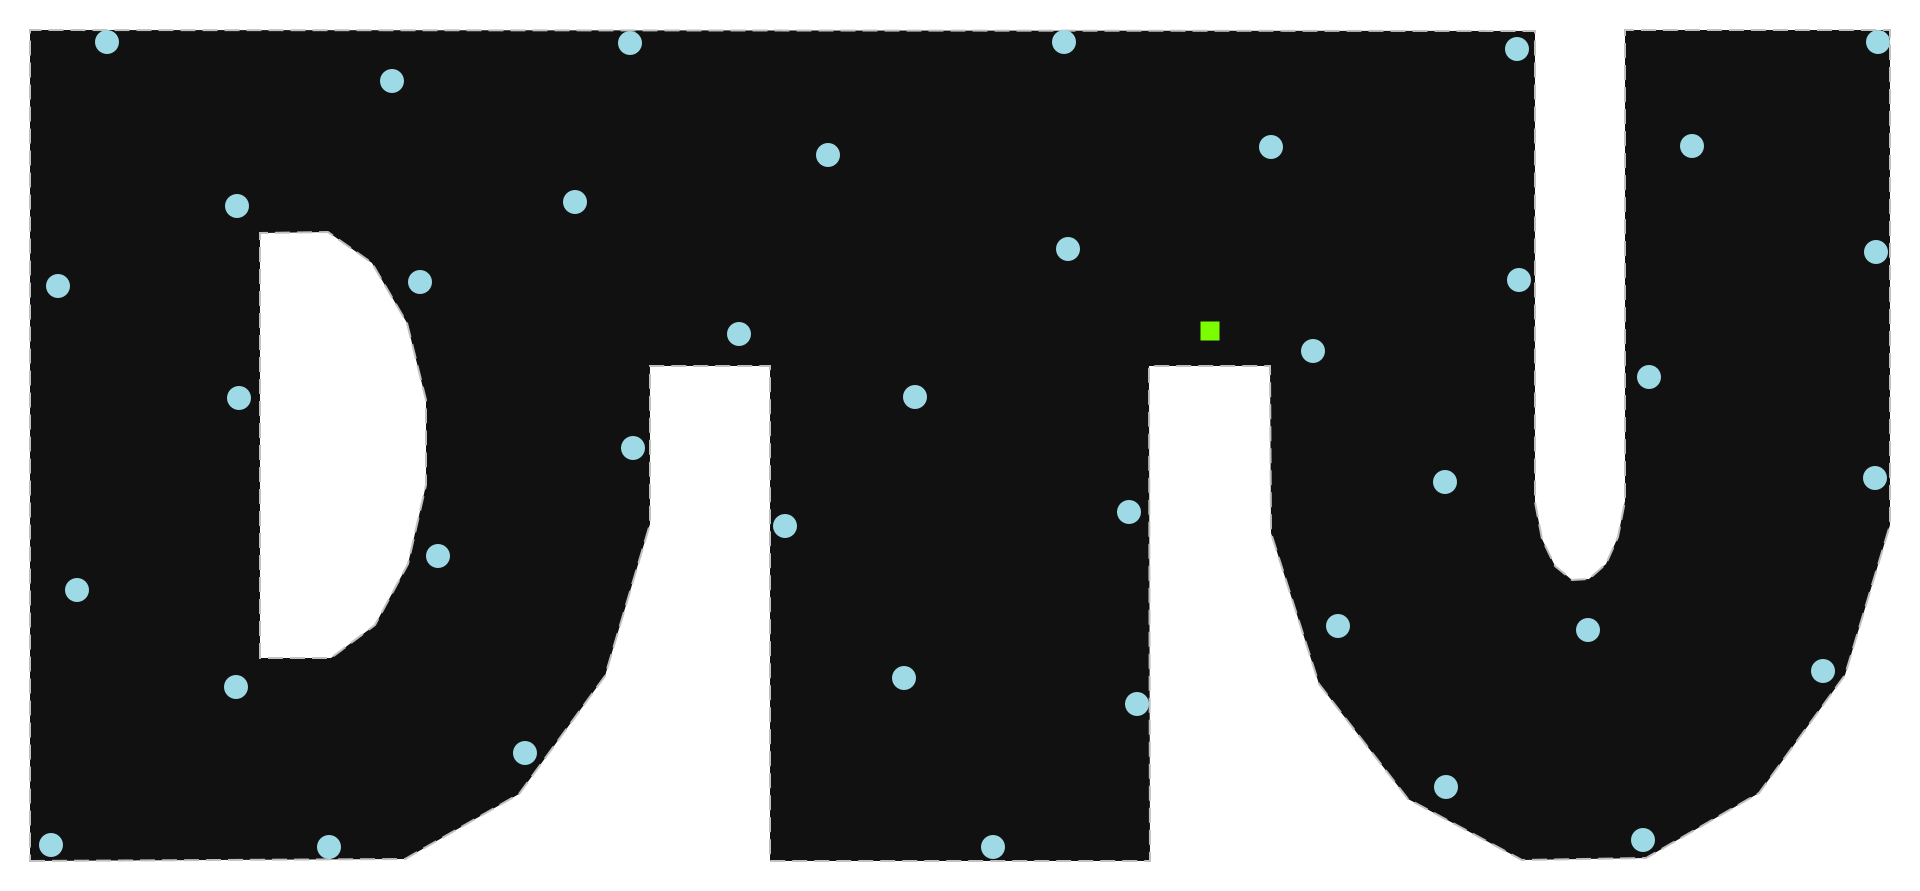

In [5]:
wfn

## Optimize

Warmstart with `EWRouter`:

>Note: In OptiWindNet, `MILPRouter` automatically uses any existing feasible network and check if it is eligible as a **warm start** for the MILP solver. If eligible, the MILP model will be warmstarted from the existing network. Therefore, to warm-start a newly created `WindFarmNetwork`, simply run one optimization with any router (e.g., `EWRouter` or `HGSRouter`) to obtain an initial solution; subsequent runs with `MILPRouter` will pick it up automatically.

In [6]:
res_warmstart= wfn.optimize(router=EWRouter())

In [7]:
wfn.length()

1820.1681190424422

The syntax for defining a MILPRouter is:

```python
router = MILPRouter(solver_name='ortools', time_limit=60, mip_gap=0.005, verbose=True)
```
The solver name could be choosen from among following solvers:
```python
solver_name = 'ortools'
solver_name = 'gurobi'
solver_name = 'cbc'
solver_name = 'cplex'
solver_name = 'Highs'
solver_name = 'scip'
```

Rest of arguments (time_limit, mip_gap, verbose) are the same for all solvers.

In this example we use 'ortools' which is an opensource tool. You can easily use other solvers (note that depending on your problem size, you might need license for some of the solvers, e.g. cplex, gurobi)

In [8]:
router = MILPRouter(solver_name='ortools', time_limit=60, mip_gap=0.005, verbose=True)

>If desired, set the logging level to `INFO` before running `.optimize()` with the `MILPRouter` to display detailed messages about the solver configuration:
>```python
>import logging
>logging.basicConfig(level=logging.INFO)
>```

In [9]:
res = wfn.optimize(router=router)

In [10]:
wfn.solution_info()

{'runtime': 60.1965191,
 'bound': 1548.1667605297823,
 'objective': 1575.3554359240065,
 'relgap': 0.017258756198265224,
 'termination': 'FEASIBLE'}

In [11]:
wfn.length()

1575.355435924007

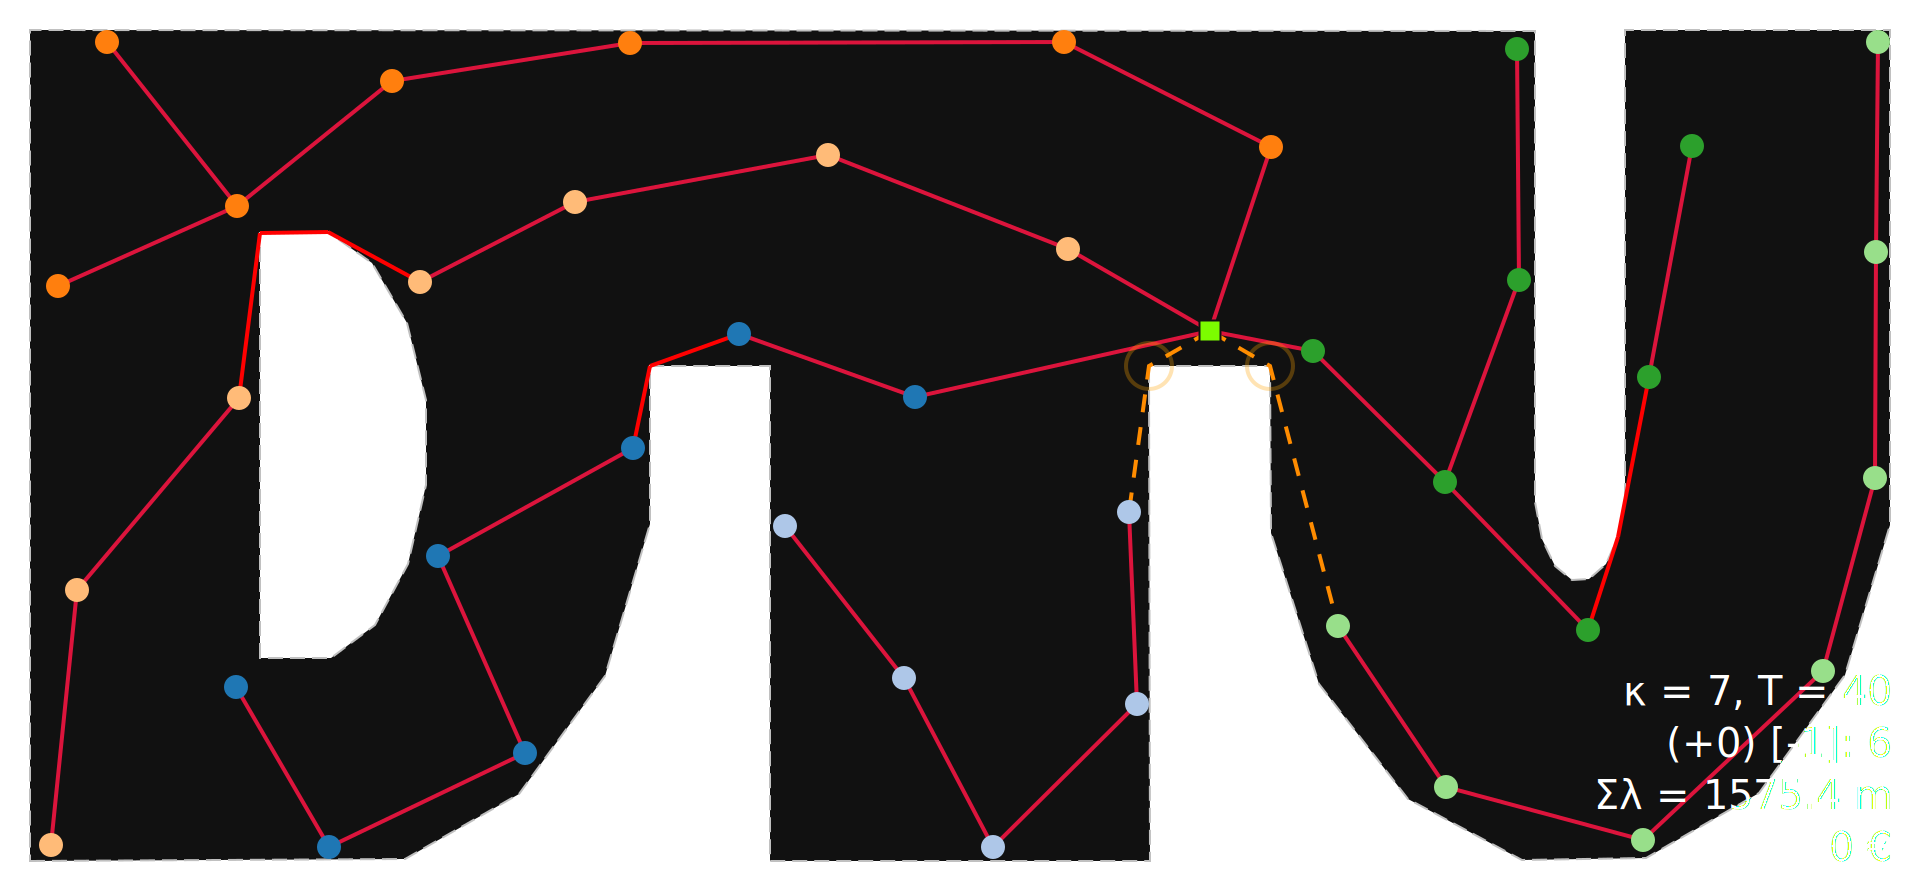

In [12]:
wfn